In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [30]:
train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [4]:
train.shape

(1460, 81)

In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


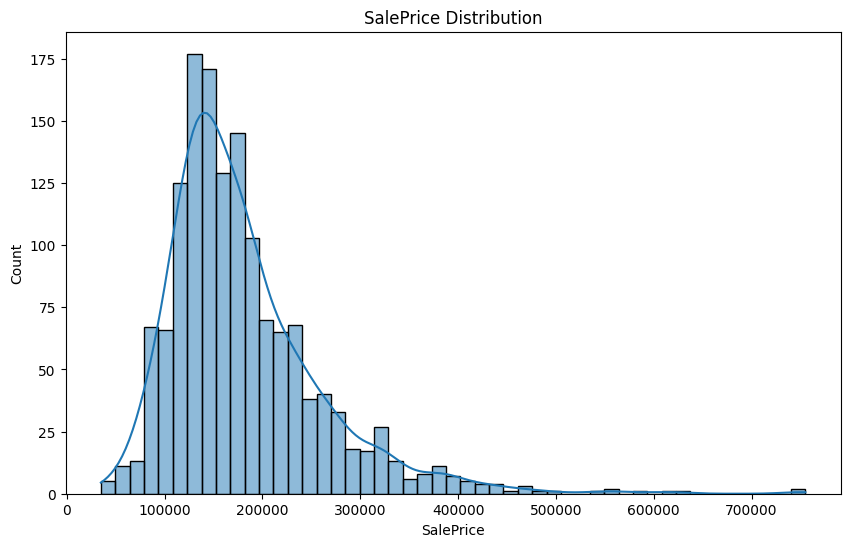

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

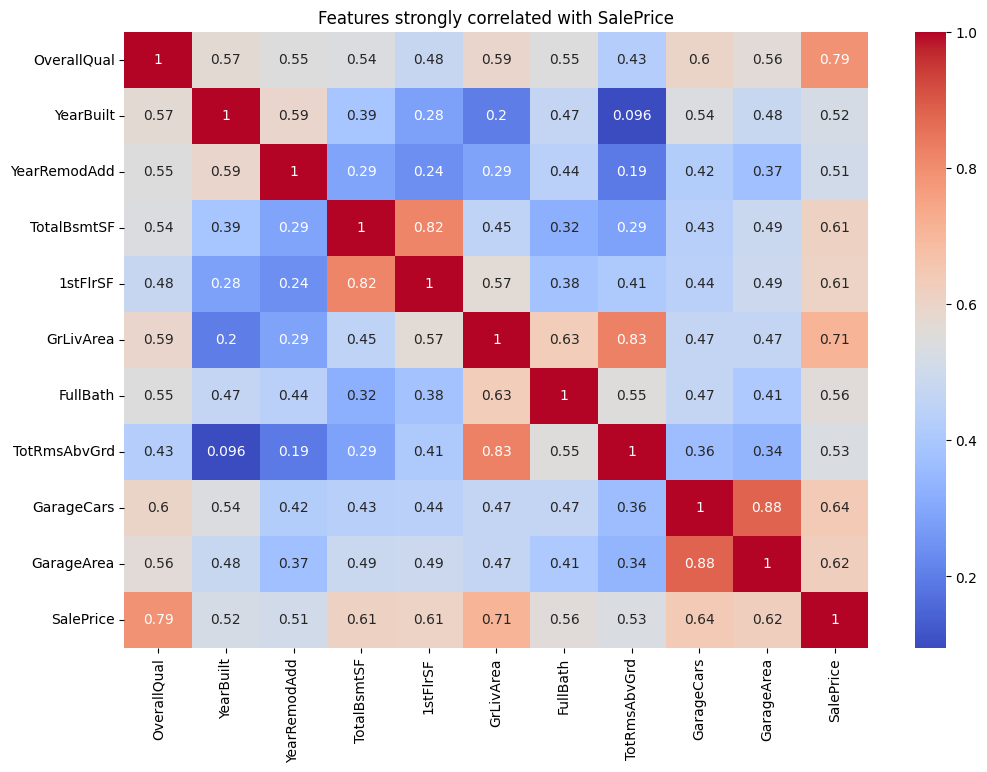

In [12]:
# 6. Ən güclü korrelyasiya edən dəyişənləri tapmaq
numeric_features = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()
top_corr_features = corr.index[abs(corr['SalePrice']) > 0.5]
plt.figure(figsize=(12,8))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title('Features strongly correlated with SalePrice')
plt.show()

In [13]:
# GarageType boş olan evlərdə digər garage ilə bağlı dəyişənlərə baxaq
train[train['GarageType'].isnull()][['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].head()


,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN


In [38]:
train['LotFrontage'] = train.groupby(train['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#'LotFrontage' boş dəyərlərini eyni Neighborhood üzrə median ilə doldururuq

In [ ]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    train[col] = train[col].fillna('None')
# Qarajla bağlı boş olan sütunlar 'None' və ya 0 ilə doldurulur

In [20]:
train ['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)


In [21]:
bsmnt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmnt_cols:
    train[col] = train[col].fillna('None')
# Bina ilə bağlı boş olan sütunlar 'None' və ya 0 ilə doldurulur


In [24]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [25]:
train['PoolQC'] = train['PoolQC'].fillna('None')


In [26]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [27]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea


In [32]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0) # MasVnrArea bos deyerlerini 0 ile doldururuq

In [31]:
mask = train['MasVnrType'].isnull()

print(train.loc[mask, ['MasVnrType', 'MasVnrArea']])

     MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[872 rows x 2 columns]


In [34]:
# kateqorik bos deyerleri en cox tekrarlanan ile doldururuq
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].fillna(train[col].mode()[0])

In [ ]:
drop_cols = ['Alley','Fence','MiscFeature','Id']
train.drop(drop_cols, axis=1, inplace=True)
# 'Alley', 'Fence', 'MiscFeature' sutunları bos olan deyerlerin sayi cox oldugu ucun silinir

In [39]:
print(train.isnull().sum().sort_values(ascending=False).head(10))

GarageYrBlt     81
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
MSSubClass       0
dtype: int64


In [ ]:
# GarageYrBlt bos olan evlerde GarageType nedir?
train.loc[train['GarageYrBlt'].isnull(), 'GarageType'].unique()


array(['Attchd'], dtype=object)

In [41]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)


In [42]:
print(train.isnull().sum().sort_values(ascending=False).head(10))


MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
dtype: int64


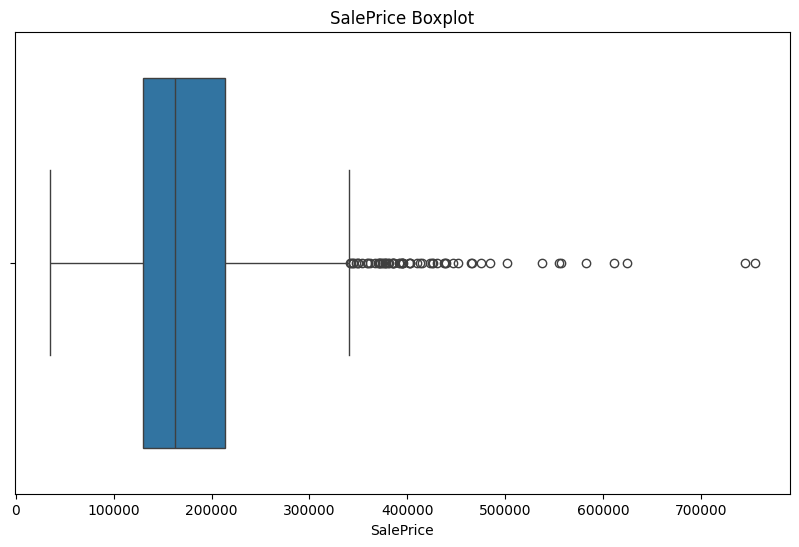

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

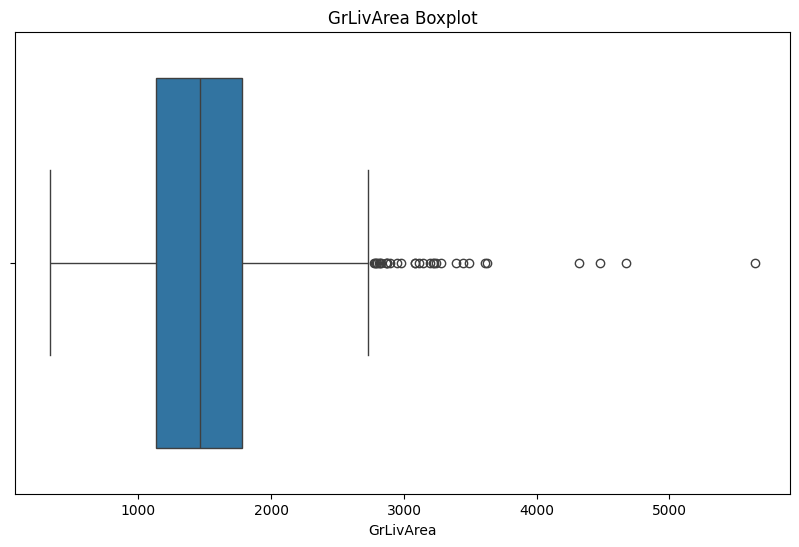

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['GrLivArea'])
plt.title('GrLivArea Boxplot')
plt.show()

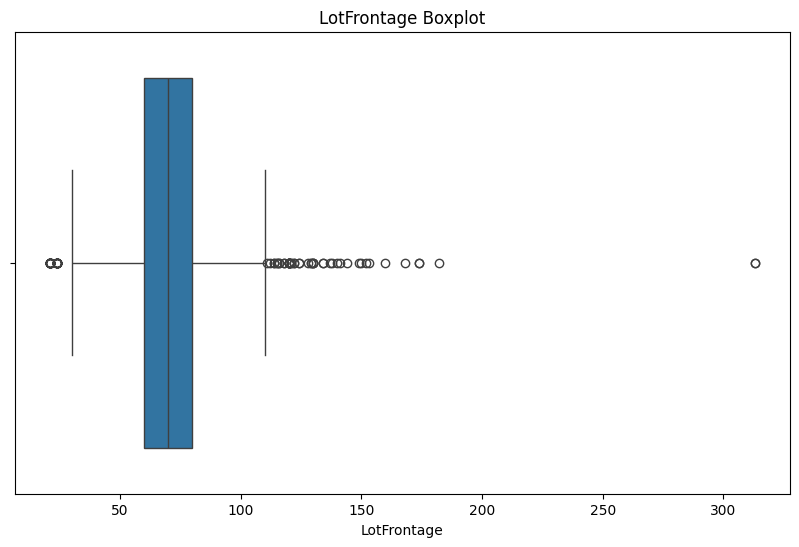

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['LotFrontage'])
plt.title('LotFrontage Boxplot')
plt.show()

In [52]:
train[train['SalePrice'] > 500000].shape[0] / train.shape[0] * 100


0.6164383561643836

In [53]:
def cap_using_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR  = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].apply(lambda x : upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data


In [54]:
train = cap_using_IQR(train, 'SalePrice')

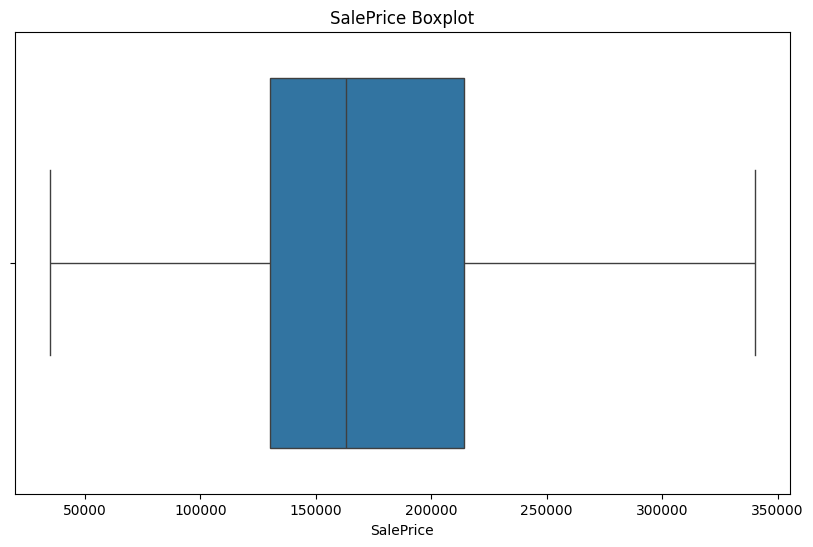

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

In [56]:
train = cap_using_IQR(train, 'LotFrontage')

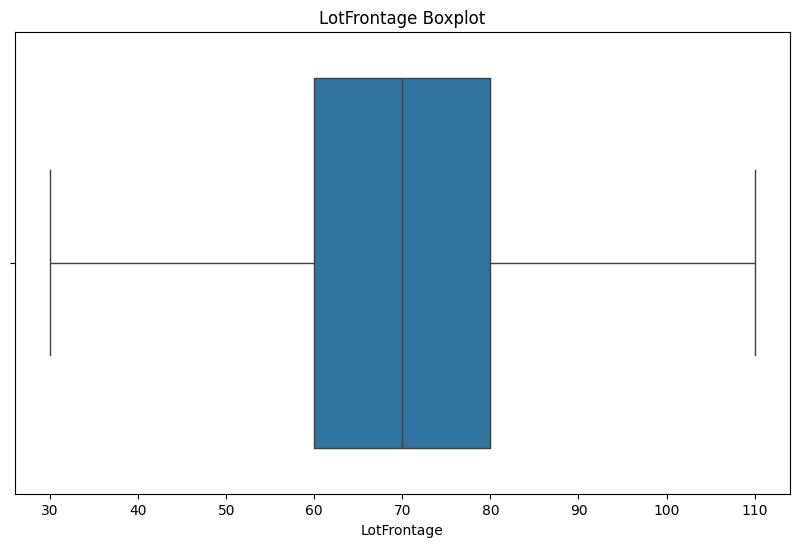

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['LotFrontage'])
plt.title('LotFrontage Boxplot')
plt.show()

In [58]:
train =cap_using_IQR(train, 'GrLivArea')

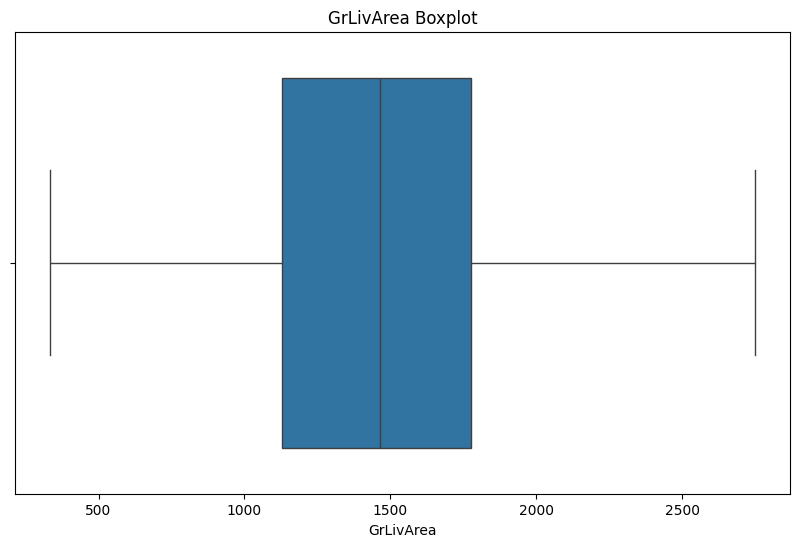

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train['GrLivArea'])
plt.title('GrLivArea Boxplot')
plt.show()

In [61]:
categorical_feauters = train.select_dtypes(include=['object']).columns

In [62]:
print(categorical_feauters)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition'],
      dtype='object')


In [64]:
from sklearn.preprocessing import LabelEncoder
# ordinal deyisenleri LabelEncoder ile kodlayiriq
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

le = LabelEncoder()

for col in  ordinal_features:
    train[col] = le.fit_transform(train[col])

In [65]:
# qalan kateqorikal sutunları OneHotEncoder ile kodlayiriq
train = pd. get_dummies(train, columns=[col for col in categorical_feauters if col not in ordinal_features], drop_first=True)

In [66]:
x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

from sklearn.model_selection import  train_test_split

In [67]:
X_train , X_test , Y_train , Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 27597.039950649047
R2: 0.8442303791224396


Feature Engineering for better model performance

In [ ]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
# umumi saheni hesablamaq ucun 3 sutunu toplayiriq

In [70]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
# evin yasini hesablamaq ucun 2 sutunu toplayiriq
train['Remod'] = train['YearRemodAdd'] - train['YearBuilt']
# evin son temirinden nece il kecdiyini hesablamaq ucun 2 sutunu cixiriq

In [71]:
train['QualGrLiv'] = train['OverallQual'] * train['GrLivArea']
# evin keyfiyyetini ve sahesini birleşdiririk

In [72]:
train['TotalBath'] = train['FullBath'] + 0.5 * train['HalfBath'] + train['BsmtFullBath'] + 0.5 * train['BsmtHalfBath']
# hamam sayini hesablamaq ucun 4 sutunu toplayiriq

In [74]:
# log transformasiya edirik 

train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

from sklearn.model_selection import  train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)


print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 0.1471717561409407
R2: 0.8683691791226534


In [76]:
real_rmse = np.expm1(0.147)
print(real_rmse)

0.1583539630298553


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAE
mae = mean_absolute_error(Y_test, y_pred)
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
# R2
r2 = r2_score(Y_test, y_pred)
# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100



print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE: 0.09
RMSE: 0.15
R2: 0.8684
MAPE: 0.77%


In [80]:
test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
test_r2 = r2_score(Y_test, y_pred)
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2: {test_r2:.4f}")

Test RMSE: 0.1472
Test R2: 0.8684


In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression obyekti
ridge = Ridge()

# Alpha üçün müxtəlif qiymətlər sınayırıq
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200]}

# Grid Search Cross Validation
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, Y_train)

# Ən yaxşı modeli çıxarırıq
best_ridge = ridge_grid.best_estimator_
print(f"Ən yaxşı alpha (Ridge): {ridge_grid.best_params_}")

# Test datasında yoxlayaq
y_pred_ridge = best_ridge.predict(X_test)

# Yeni performans
from sklearn.metrics import mean_squared_error, r2_score

ridge_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
ridge_r2 = r2_score(Y_test, y_pred_ridge)

print(f"Ridge RMSE: {ridge_rmse:.4f}")
print(f"Ridge R2: {ridge_r2:.4f}")


Ən yaxşı alpha (Ridge): {'alpha': 10}
Ridge RMSE: 0.1286
Ridge R2: 0.8996


In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]}

lasso_grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, Y_train)

best_lasso = lasso_grid.best_estimator_
print(f"Ən yaxşı alpha (Lasso): {lasso_grid.best_params_}")

# Test datasında yoxlayaq
y_pred_lasso = best_lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_lasso))
lasso_r2 = r2_score(Y_test, y_pred_lasso)

print(f"Lasso RMSE: {lasso_rmse:.4f}")
print(f"Lasso R2: {lasso_r2:.4f}")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.007e+00, tolerance: 1.313e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+00, tolerance: 1.288e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Ən yaxşı alpha (Lasso): {'alpha': 0.001}
Lasso RMSE: 0.1314
Lasso R2: 0.8951
